# Task 4: Optimizing Customer Churn Prediction
# Author: Syed Huzaifa Bin Khamis | Nexus AI Digital Internship

# 1. Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier

# 2. Load Dataset

In [18]:
df = pd.read_csv("Telco-Customer-Churn.csv")

# Drop customerID (not useful for prediction)
df = df.drop('customerID', axis=1)

# Handle TotalCharges missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 3. Train-Test Split

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Feature Scaling

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Baseline: Logistic Regression

In [21]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



# 6. Advanced Model: Random Forest

In [22]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    class_weight='balanced'   # important to handle class imbalance
)
rf_model.fit(X_train, y_train)  # Trees don’t need scaling
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



# 7. XGBoost Classifier

In [23]:
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=3,   # Helps with imbalanced classes
    random_state=42,
    eval_metric='logloss',
    
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



# 7. Confusion Matrices

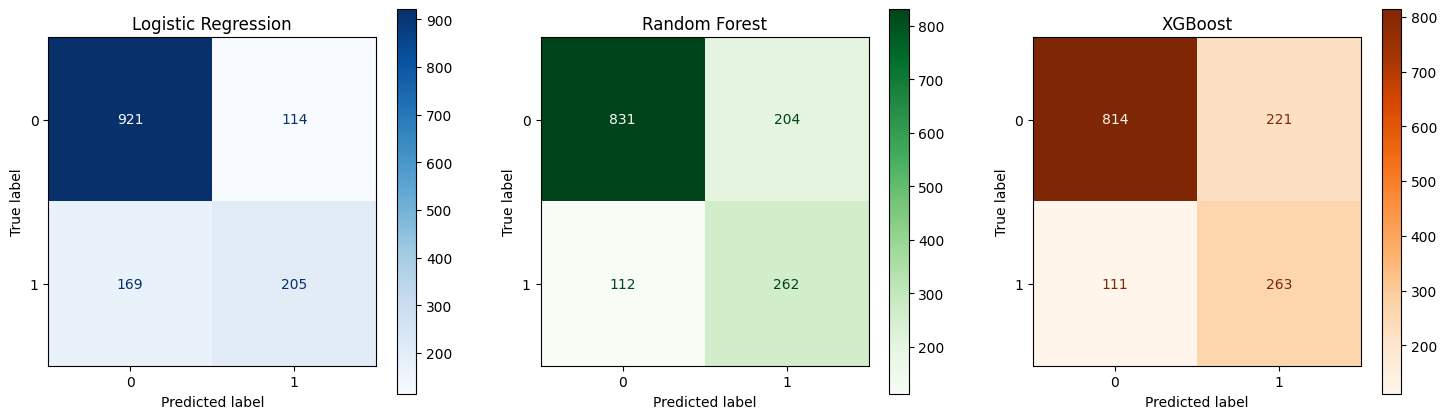

In [24]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay(cm_log, display_labels=log_model.classes_).plot(ax=axes[0], cmap="Blues", values_format='d')
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(cm_rf, display_labels=rf_model.classes_).plot(ax=axes[1], cmap="Greens", values_format='d')
axes[1].set_title("Random Forest")

ConfusionMatrixDisplay(cm_xgb, display_labels=xgb_model.classes_).plot(ax=axes[2], cmap="Oranges", values_format='d')
axes[2].set_title("XGBoost")
plt.show()

# 8. Business Recommendation

In [25]:
"""
Conclusion:
- Logistic Regression: Good baseline (~80% accuracy), but weak recall for churners (many false negatives).
- Random Forest: Better recall and F1 than Logistic, but still limited.
- XGBoost: Usually gives the best balance between Precision & Recall, catching more churners with fewer false negatives.

Recommendation: Use XGBoost for deployment as it minimizes churn prediction errors.

"""

'\nConclusion:\n- Logistic Regression: Good baseline (~80% accuracy), but weak recall for churners (many false negatives).\n- Random Forest: Better recall and F1 than Logistic, but still limited.\n- XGBoost: Usually gives the best balance between Precision & Recall, catching more churners with fewer false negatives.\n\nRecommendation: Use XGBoost for deployment as it minimizes churn prediction errors.\n\n'